In [1]:
import copy
import numpy as np
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
from numpy import linalg

In [154]:
#Compute R matrix
data = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'])
R = pd.pivot_table(data, values='rating', columns=['movieId'], index=['userId'])
R_mat = R.as_matrix()
print("R is ..")
print(R.shape)
data_mat = data.as_matrix()
# return data_mat, R_mat

R.head()

R is ..
(671, 9066)


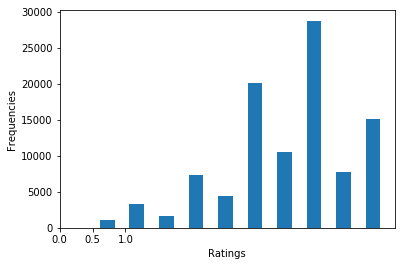

In [170]:
# Q2
plt.hist(data.rating, rwidth=0.5)
plt.xticks(np.arange(0, 5.5, 0.5))
# plt.subplots_adjust(bottom=0.45)
plt.xlabel("Ratings")
plt.ylabel("Frequencies")
#plt.savefig('histogram.png', format='png')
plt.show()

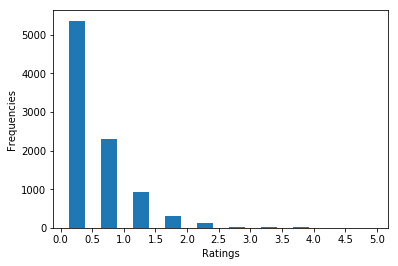

movieId
1         0.915922
2         0.768408
3         1.300345
4         0.813609
5         0.883610
6         0.683802
7         1.193485
8         2.160000
9         0.627500
10        0.587745
11        0.790489
12        1.161265
13        0.839844
14        0.586368
15        0.739669
16        0.761590
17        0.851846
18        1.349482
19        1.153474
20        1.479290
21        1.011801
22        0.906683
23        0.855372
24        1.270112
25        1.156504
26        0.640000
27        0.408163
28        0.618056
29        0.636875
30        0.822500
            ...   
158238    0.062500
158314    0.000000
158528    0.000000
158956    0.000000
159093    1.000000
159462    0.000000
159690    0.000000
159755    0.000000
159858    0.062500
159972    0.000000
160080    0.000000
160271    0.000000
160438    0.062500
160440    0.000000
160563    2.250000
160565    0.000000
160567    0.000000
160590    0.000000
160656    0.000000
160718    0.000000
161084    0.000000
1611

In [169]:
# Q6
plt.hist(np.var(R, axis = 0), rwidth=0.5)
plt.xticks(np.arange(0, 5.5, 0.5))
# plt.subplots_adjust(bottom=0.45)
plt.xlabel("Ratings")
plt.ylabel("Frequencies")
#plt.savefig('histogram.png', format='png')
plt.show()

In [17]:
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import train_test_split

In [412]:
# Load the data
dataset = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'])
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)

In [50]:
def compute_average():
    average_mae = []
    average_rmse = []
    # apply k-nn
    for i in range(2, 102, 2):
        algo = KNNWithMeans(k=i)
        # Run 10-fold cross-validation and print results. 
        result = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
        average_mae.append(result['test_mae'].mean())
        average_rmse.append(result['test_rmse'].mean())
    return average_mae, average_rmse

average_mae, average_rmse = compute_average()

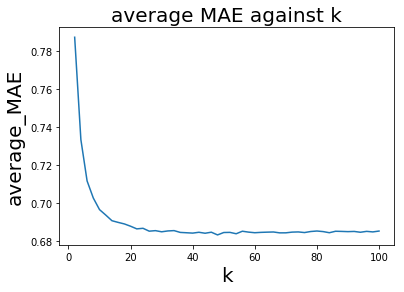

In [177]:
plt.plot(range(2,102,2),average_mae)
plt.ylabel('average_MAE', fontsize = 20)
plt.xlabel('k', fontsize = 20)
plt.title('average MAE against k', fontsize = 20)
plt.show()

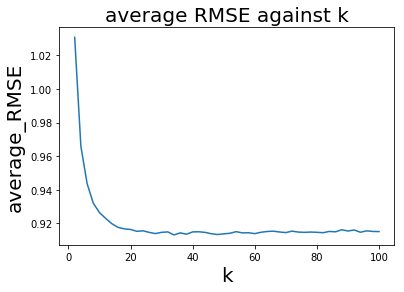

In [60]:
plt.plot(range(2,102,2),average_rmse)
plt.ylabel('average_RMSE', fontsize = 20)
plt.xlabel('k', fontsize = 20)
plt.title('average RMSE against k', fontsize = 20)
plt.show()

In [440]:
def trimming(testset, test_type):
    testset = pd.DataFrame(testset, columns=['userId', 'movieId', 'rating'])
    if test_type == "unpopular":
        test_set = testset.groupby("movieId").filter(lambda x: len(x) <= 2)
    elif test_type == "popular":
        test_set = testset.groupby("movieId").filter(lambda x: len(x) > 2)
    elif test_type == "highvariance":
        test_set = testset.groupby('movieId').filter(lambda x: np.var(x['rating'])>=2 and len(x) > 5)
    test_data = np.array(test_set)#np.ndarray()
    testset_trimmed=test_data.tolist()#list
    return testset_trimmed

In [455]:
from surprise.model_selection import KFold
from surprise import accuracy
def train_filter(data, test_type):
    average_rmse = []
    min_mae = float("inf")
    min_rmse = float("inf")
    kf = KFold(n_splits=10)

    for i in range(2, 102, 2):
        mae = 0.0
        rmse = 0.0
        algo = KNNWithMeans(k=i)

        for trainset, testset in kf.split(data):
            # train and test algorithm. 
            algo.fit(trainset)
#             print "testset before trimming:  ", len(testset)

            testset = trimming(testset, test_type)  ##trimming the test set
#             print "testset after trimming:  ",len(testset)

            predictions = algo.test(testset)

            # Compute MAE and RMSE
            rmse += accuracy.rmse(predictions, verbose=False)
    
        if min_rmse > rmse/10:   #record minmum rmse
            min_rmse = rmse/10
            
        average_rmse.append(rmse / 10)
    return average_rmse, min_rmse

In [432]:
### unpopular trimming test set
data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)
average_rmse, min_rmse = train_filter(data, "unpopular")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Minimum RMSE:  0.9900589416642103


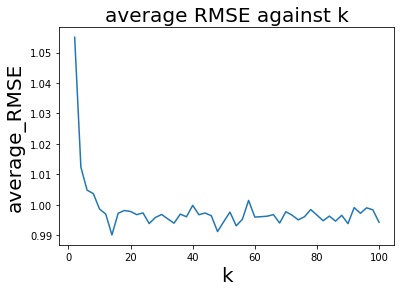

In [433]:
print "Minimum RMSE: ", min_rmse
plt.plot(range(2,102,2),average_rmse)
plt.ylabel('average_RMSE', fontsize = 20)
plt.xlabel('k', fontsize = 20)
plt.title('average RMSE against k', fontsize = 20)
plt.show()

In [437]:
### popular trimming test set
data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)
average_mae, average_rmse, min_mae, min_rmse = train_filter(data, "popular")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Minimum RMSE:  0.8746824922443107


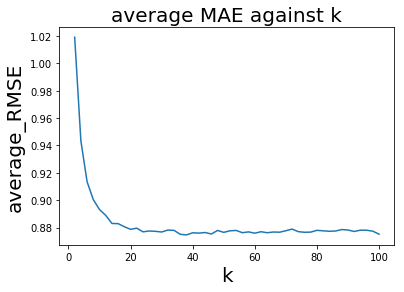

In [438]:
print "Minimum RMSE: ", min_rmse
plt.plot(range(2,102,2),average_rmse)
plt.ylabel('average_RMSE', fontsize = 20)
plt.xlabel('k', fontsize = 20)
plt.title('average RMSE against k', fontsize = 20)
plt.show()

In [456]:
data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)
average_rmse, min_rmse = train_filter(data, "highvariance")

Computing the msd similarity matrix...
Done computing similarity matrix.
testset before trimming:   10001
testset after trimming:   52
Computing the msd similarity matrix...
Done computing similarity matrix.
testset before trimming:   10001
testset after trimming:   76
Computing the msd similarity matrix...
Done computing similarity matrix.
testset before trimming:   10001
testset after trimming:   71
Computing the msd similarity matrix...
Done computing similarity matrix.
testset before trimming:   10001


KeyboardInterrupt: 

Minimum RMSE:  1.3723971501924805


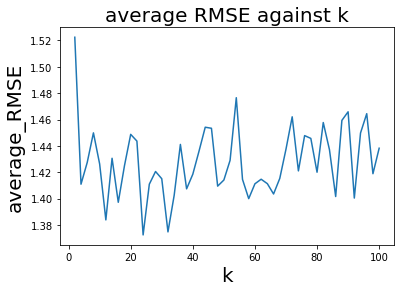

In [445]:
print "Minimum RMSE: ", min_rmse
plt.plot(range(2,102,2),average_rmse)
plt.ylabel('average_RMSE', fontsize = 20)
plt.xlabel('k', fontsize = 20)
plt.title('average RMSE against k', fontsize = 20)
plt.show()

In [474]:
def thresholding(threshold):
    dataset = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'])
    actual_like_index = np.where(dataset['rating'] > threshold)
    actual_dislike_index = np.where(dataset['rating'] <= threshold)
    for i in actual_like_index:
        dataset['rating'][i] = 1
    for i in actual_dislike_index:
        dataset['rating'][i] = 0
    reader = Reader()
    data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)
    return data

In [475]:
def plot_roc(target, predict, i):
    fpr, tpr, thresholds = roc_curve(target, predict)
    fig, ax = plt.subplots()
    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.set_title('ROC Curve for threshold = %f' %i)
    ax.legend(loc="lower right")

/Users/mona/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mona/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


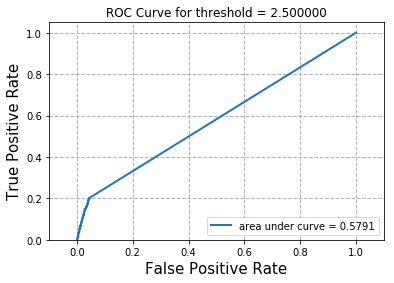

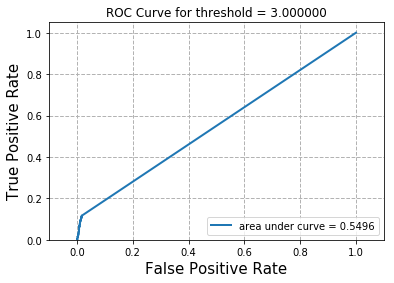

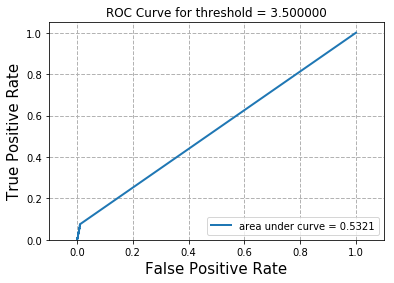

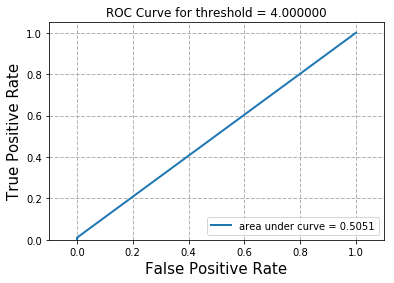

In [477]:
from surprise.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

for thre in [2.5, 3, 3.5, 4]:
    data = thresholding(thre)
    trainset, testset = train_test_split(data, test_size=0.1)
    
    algo = KNNWithMeans(k = 40)
    algo.fit(trainset)
    predictions = algo.test(testset)

    target = []
    for i in range(len(testset)):
        target.append(testset[i][2])

    predict = []
    for i in range(len(predictions)):
        predict.append(predictions[i][3])
    
    plot_roc(target, predict, thre)